Realizar un estudio de aprendizaje supervisado utilizando los algoritmos bayesianos. Para ello en esta tarea se utilizarán dos datasets.

No quito los outliers para comprobar si los modelos Naive Bayes, independientemente de que no sean los mejores, para comprobar si son buenos ante el ruido en los datos.

**Ejercicio 1.** https://www.kaggle.com/yasserh/wine-quality-dataset. Clasifición de la calidad del vino según alguno de sus parámetros (ph, densidad, sulfatos, alcohol, azúcar, etc.). El dataset contiene una serie de datos sobre unos vinos y su calidad (de 0 a 10). Este problema es de clasificación puesto que consiste en clasificar el vino en concreto en su clase de calidad (valores discretos del 0 al 10).

**_Importación de librerías necesarias_**

In [1]:
# Importación de la librerias necesarias
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
import pandas as pd
import seaborn as sns
# import matplotlib.pyplot as plt
from google.colab import drive # Librería para Drive

**_Preproceso_**

*Importación de los datos*

In [2]:
# Descomentar si se quiere montar google drive en colab
drive.mount("/content/drive") # Monto mi drive en colab

# Cambiar la ruta si no se necesita importar los datos desde el drive
df_vino = pd.read_csv("/content/drive/My Drive/IABD/SAA/Tema 2/Tarea 1/dataset_vino.csv") # Leo el csv desde el drive, parte de la cadena que no cambia "/content/drive/My Drive/miruta/fichero.*"

Mounted at /content/drive


*Mostrar las primera y últimas filas del data frame importado*

In [3]:
df_vino
# Colab muestra las primeras y últimas filas, si se hace desde un entorno de ejecución diferente que no se jupiter se haría de la siguiente forma:
# df_vino.head()
# df_vino.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


*Mostar parámetros estadísticos de los datos (media, desviación típica, quartiles, etc.).*

In [4]:
df_vino.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


*Mostrar un mapa de calor que indique la correlación entre variables*

<Axes: >

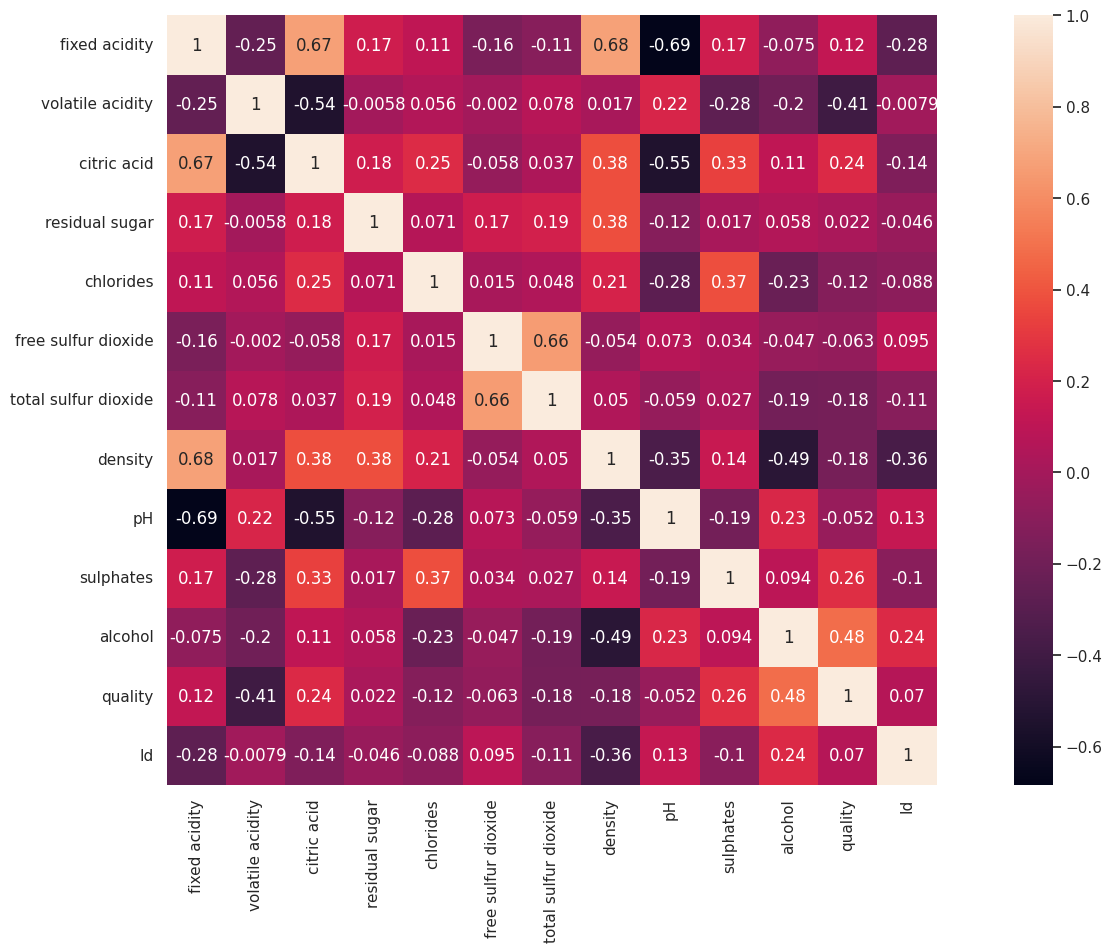

In [5]:
sns.set(rc={"figure.figsize": (20, 10)}) # Esta es una forma de redimensionar el tamaño de la parcela
# plt.figure(figsize=(15, 8)) # Otra forma para redimensionar el tamaño de la parcela
sns.heatmap(df_vino.corr(), square = True, annot = True)

*Seleccionar las características de entrada y etiquetas (resultados)*

In [6]:
# x_df_vino = df_vino.drop("quality", axis=1) # Al principio lo hice sin eliminar la columna Id
x_df_vino = df_vino.drop(["quality", "Id"], axis=1) # Nota: Elimino la Id porque no tiene sentido que esté en el estudio. Además, al eliminarlo me mejora la predicción aunque la mejora es infima, se puede observar en el ejemplo de GaussianNB
y_df_vino = df_vino['quality']

*Separar datos entre entrenamiento y prueba (usando un 75% para entrenamiento y 25% test)*

In [7]:
x_entrenamiento, x_test, y_entrenamiento, y_test = train_test_split(x_df_vino, y_df_vino, random_state=1)

**_Entrenamiento y predicción_**

- **GuassianNB**

_Elegir, instanciar y entrenar modelo_

In [8]:
modeloGNB = GaussianNB() # Con Id: 0.590909 Sin Id: 0.597902 Sin Id, total sulfur dioxide: 0.562937
modeloGNB.fit(x_entrenamiento, y_entrenamiento)

GaussianNB()

*Realizar una predicción con los datos de prueba*

In [9]:
y_prediccionGNB = modeloGNB.predict(x_test)

**_Evaluación_**

*Mostrar el porcentaje de elementos correctamente clasificados*

In [10]:
print("La probabilidad de acertar es:", accuracy_score(y_test, y_prediccionGNB))

La probabilidad de acertar es: 0.5979020979020979


*Mostrar la predicción realiza (imprimir la variable con la predicción)*

In [11]:
print(y_prediccionGNB)

[6 5 7 6 6 7 5 6 5 5 6 5 5 5 7 7 5 5 5 7 5 6 6 6 6 6 5 6 6 6 6 6 7 5 6 5 4
 5 6 5 7 6 7 6 6 6 7 5 5 5 5 5 6 5 5 5 5 5 4 6 6 5 7 7 5 6 5 5 6 4 6 6 6 6
 5 5 5 6 6 6 5 5 5 5 6 7 5 6 6 6 5 6 7 6 6 5 6 7 6 5 7 5 5 6 6 7 6 5 5 6 6
 5 6 5 7 7 5 5 6 4 5 5 7 6 5 5 5 5 6 6 5 6 5 6 7 7 5 5 5 5 6 6 7 5 6 7 6 6
 6 6 7 5 5 4 6 6 6 5 6 5 5 7 5 6 5 5 5 6 5 7 5 7 5 7 6 7 6 6 6 6 7 7 5 7 5
 6 7 6 5 7 4 5 6 5 6 6 6 6 3 5 6 5 6 5 6 6 6 6 6 5 6 5 5 5 7 7 6 3 6 7 7 6
 6 6 7 7 7 4 6 5 5 5 7 6 5 6 5 5 5 7 5 5 5 6 5 6 5 7 6 6 6 6 5 7 6 6 5 6 6
 5 5 6 7 5 5 6 5 6 5 4 4 6 7 6 6 5 6 6 7 6 6 5 5 6 4 6]


*Representar gráficamente la clasificación obtenida (matríz de confusión).*

- **MultinomialNB**

_Elegir, instanciar y entrenar modelo_

In [12]:
modeloMNB = MultinomialNB() # Con Id: 0.332167 Sin Id: 0.458041 Sin Id, total sulfur dioxide: 0.465034
modeloMNB.fit(x_entrenamiento, y_entrenamiento)

MultinomialNB()

_Realizar una prediccón con los datos de prueba_

In [13]:
y_prediccionMNB = modeloMNB.predict(x_test)

**_Evaluación_**

*Mostrar el porcentaje de elementos correctamente clasificados*

In [14]:
print("La probabilidad de acertar es:", accuracy_score(y_test, y_prediccionMNB))

La probabilidad de acertar es: 0.458041958041958


*Mostrar la predicción realiza (imprimir la variable con la predicción)*

In [15]:
print(y_prediccionMNB)

[7 5 5 6 6 7 5 6 5 5 6 5 6 6 3 6 6 5 5 3 6 7 7 6 6 5 5 6 5 6 7 6 7 5 5 5 5
 7 6 5 5 7 3 6 7 6 6 6 5 5 5 6 6 5 3 5 5 5 3 6 5 6 3 7 3 5 3 6 6 6 7 6 6 6
 5 6 5 5 6 7 5 5 6 5 6 3 5 6 6 6 6 6 6 7 5 5 6 7 7 5 3 5 6 5 5 7 7 6 5 7 3
 6 6 6 6 6 5 5 6 3 5 5 6 6 5 6 5 6 6 6 6 6 6 6 6 3 5 5 5 6 6 6 6 5 6 7 6 6
 6 6 3 6 3 5 7 6 6 6 6 5 5 7 7 6 6 5 5 3 5 6 6 6 6 7 7 5 6 6 5 7 6 5 5 7 7
 3 7 5 5 5 6 3 7 7 5 6 6 6 3 5 6 6 6 5 5 5 6 6 6 5 6 5 5 6 3 7 6 6 7 6 3 6
 7 6 7 7 5 5 5 5 5 5 6 3 5 7 5 5 6 6 5 5 5 6 5 6 5 3 6 6 7 7 7 5 5 5 6 6 7
 5 6 5 6 5 5 5 5 7 5 5 5 6 7 6 5 5 7 5 6 5 5 5 5 5 6 6]


*Representar gráficamente la clasificación obtenida (matríz de confusión).*

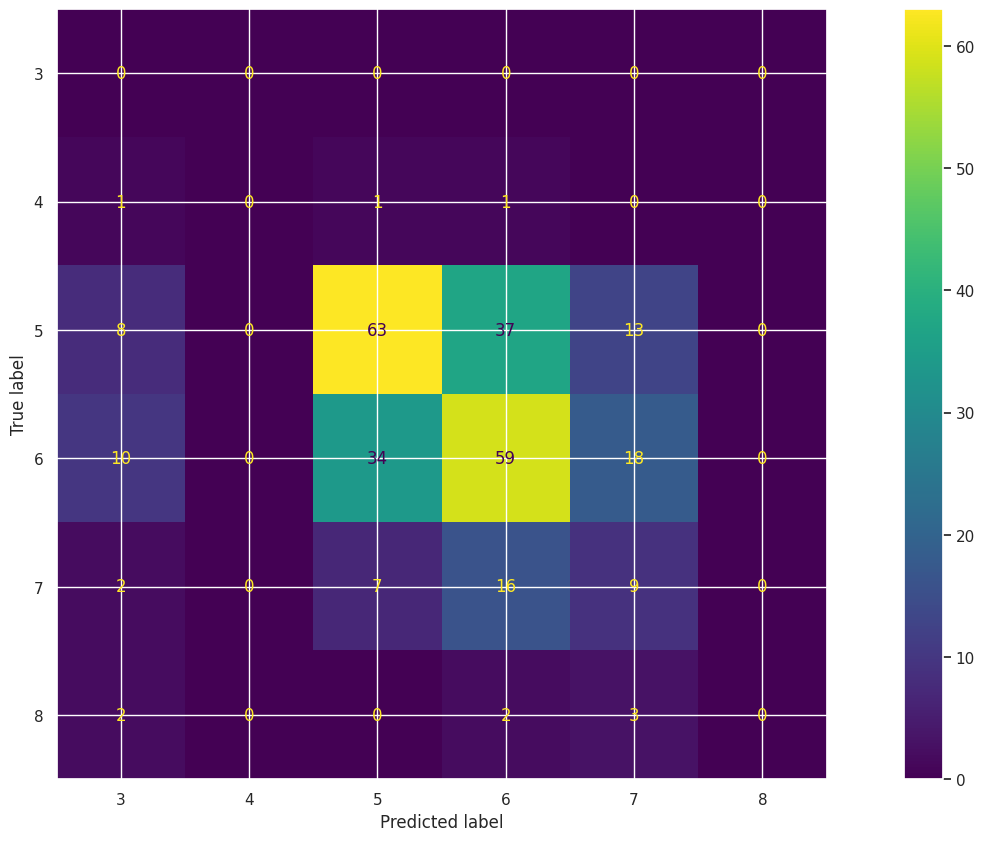

In [16]:
ConfusionMatrixDisplay.from_predictions(y_test, y_prediccionMNB)

- **ComplementNB**

_Elegir, instanciar y entrenar modelo_

In [17]:
modeloCNB = ComplementNB() # Con Id: 0.513986 - Sin Id: 0.517482 - Sin Id, total sulfur dioxide: 0.381118
modeloCNB.fit(x_entrenamiento, y_entrenamiento)

ComplementNB()

_Realizar una prediccón con los datos de prueba_

In [18]:
y_prediccionCNB = modeloCNB.predict(x_test)

**_Evaluación_**

*Mostrar el porcentaje de elementos correctamente clasificados*

In [19]:
print("La probabilidad de acertar es:", accuracy_score(y_test, y_prediccionCNB))

La probabilidad de acertar es: 0.5174825174825175


*Mostrar la predicción realiza (imprimir la variable con la predicción)*

In [20]:
print(y_prediccionCNB)

[6 5 5 6 6 6 5 6 5 5 6 5 6 6 6 6 6 5 5 6 6 6 6 6 6 5 5 6 5 6 6 6 6 5 5 5 5
 6 6 5 5 6 6 5 6 6 6 6 5 5 5 6 6 5 6 5 5 5 6 6 5 6 6 6 6 5 6 6 6 6 6 6 6 6
 5 6 5 5 6 6 5 5 6 5 6 6 5 6 6 6 6 6 6 6 5 5 6 6 6 5 6 5 6 5 5 6 6 6 5 6 6
 6 6 6 6 6 5 5 6 6 5 5 5 6 5 6 5 6 6 6 6 6 6 6 6 6 5 5 5 6 6 6 6 5 6 6 6 6
 6 6 6 6 6 5 6 6 5 6 5 5 5 6 6 6 5 5 5 6 5 6 6 7 6 6 6 5 6 6 5 6 6 5 5 6 6
 6 6 5 5 5 6 6 6 6 5 6 6 6 6 5 5 6 5 5 5 5 5 6 6 5 7 5 5 6 6 6 6 5 6 6 6 6
 6 6 6 6 5 5 5 5 5 5 6 6 5 6 5 5 6 6 5 5 5 6 5 6 5 6 6 6 6 6 6 5 5 5 6 6 6
 5 6 5 6 5 5 5 5 6 5 5 5 6 6 6 5 5 6 5 6 5 5 5 5 5 6 6]


*Representar gráficamente la clasificación obtenida (matríz de confusión).*

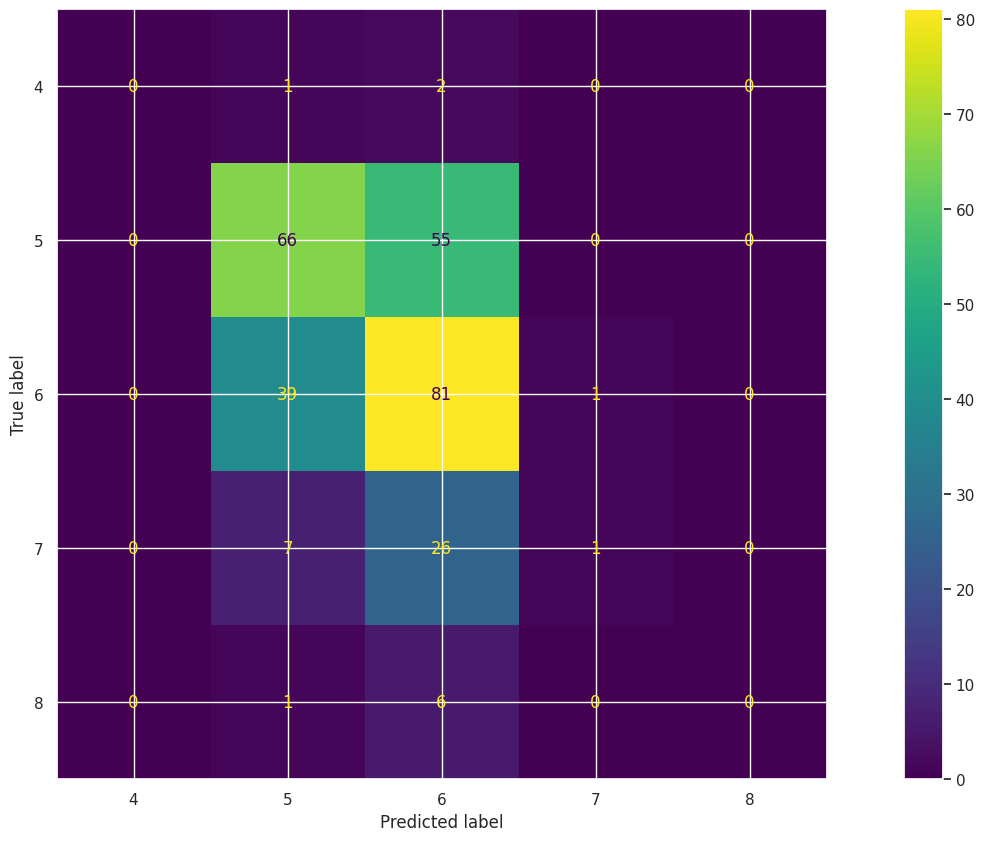

In [21]:
ConfusionMatrixDisplay.from_predictions(y_test, y_prediccionCNB)

- **BernoulliNB**

_Elegir, instanciar y entrenar modelo_

In [22]:
modeloBNB = BernoulliNB() # Con y sin Id, total sulfur dioxide: 0.405594
modeloBNB.fit(x_entrenamiento, y_entrenamiento)

BernoulliNB()

_Realizar una prediccón con los datos de prueba_

In [23]:
y_prediccionBNB = modeloBNB.predict(x_test)

**_Evaluación_**

*Mostrar el porcentaje de elementos correctamente clasificados*

In [24]:
print("La probabilidad de acertar es:", accuracy_score(y_test, y_prediccionBNB))

La probabilidad de acertar es: 0.40559440559440557


*Mostrar la predicción realiza (imprimir la variable con la predicción)*

In [25]:
print(y_prediccionBNB)

[5 5 5 5 5 5 5 5 5 5 5 5 5 6 5 5 5 5 5 5 6 5 5 5 6 5 5 5 5 5 5 5 5 5 5 5 6
 5 5 5 5 5 5 5 5 5 5 6 5 6 5 5 5 5 5 5 5 5 6 5 5 5 5 5 5 5 6 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 6 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 6 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 6 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 6 5 5 5 5 5 5 5 5 5 5 5 5 5 6 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 6 5 5 6 5 5 5 5 5 5 5 5 5 6 5 5 6 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 6 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 6 5 5 5 5 6 5 5 5 5 5 5 6 5 6 5 5 5 5 5 5
 5 6 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5]


*Representar gráficamente la clasificación obtenida (matríz de confusión).*

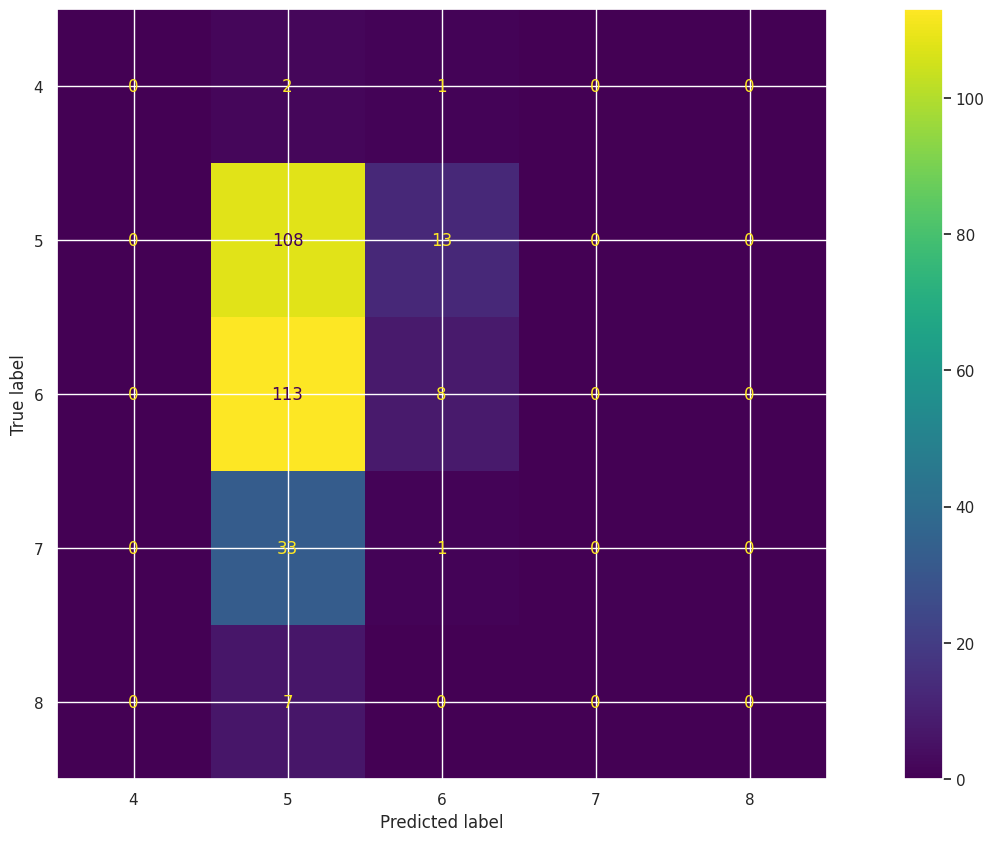

In [26]:
ConfusionMatrixDisplay.from_predictions(y_test, y_prediccionBNB)

- **CategoricalNB**

_Elegir, instanciar y entrenar modelo_

In [27]:
modeloCatNB = CategoricalNB() # Sin Id, total sulfur dioxide: 0.580419
modeloCatNB.fit(x_entrenamiento.drop("total sulfur dioxide", axis = 1), y_entrenamiento)

CategoricalNB()

_Realizar una prediccón con los datos de prueba_

In [28]:
y_prediccionCatNB = modeloCatNB.predict(x_test.drop("total sulfur dioxide", axis = 1))

**_Evaluación_**

*Mostrar el porcentaje de elementos correctamente clasificados*

In [29]:
print("La probabilidad de acertar es:", accuracy_score(y_test, y_prediccionCatNB))

La probabilidad de acertar es: 0.5804195804195804


*Mostrar la predicción realiza (imprimir la variable con la predicción)*

In [30]:
print(y_prediccionCatNB)

[6 5 6 6 5 6 6 5 6 5 6 5 5 5 6 6 6 5 5 6 5 6 6 6 5 6 5 7 5 7 6 6 6 5 5 5 7
 5 5 5 6 6 6 5 6 5 5 5 5 6 5 5 5 5 5 5 5 5 6 6 6 5 6 6 5 6 5 5 6 5 6 6 6 5
 5 5 5 5 5 6 5 6 5 5 5 8 5 5 5 5 6 6 6 6 5 5 6 6 5 5 6 7 6 6 5 5 6 5 5 6 6
 5 6 5 6 7 5 5 6 5 5 5 6 6 5 5 5 6 5 5 5 5 5 6 7 6 5 5 6 5 5 5 6 5 5 6 5 6
 5 5 7 5 5 5 5 6 6 5 6 5 5 6 5 5 5 5 5 6 5 6 5 6 5 7 5 6 6 6 6 7 7 6 6 6 5
 5 6 5 5 7 6 5 6 5 5 6 5 6 5 5 5 5 6 5 5 7 6 6 5 5 6 5 5 5 6 6 6 5 6 6 6 6
 5 5 6 6 4 5 6 5 5 5 5 6 5 6 5 5 5 6 5 5 5 6 5 6 6 7 6 5 6 5 5 6 6 6 5 6 6
 5 5 5 7 5 5 5 5 6 5 5 5 6 6 6 5 5 6 6 7 6 6 5 5 5 5 5]


*Representar gráficamente la clasificación obtenida (matríz de confusión).*

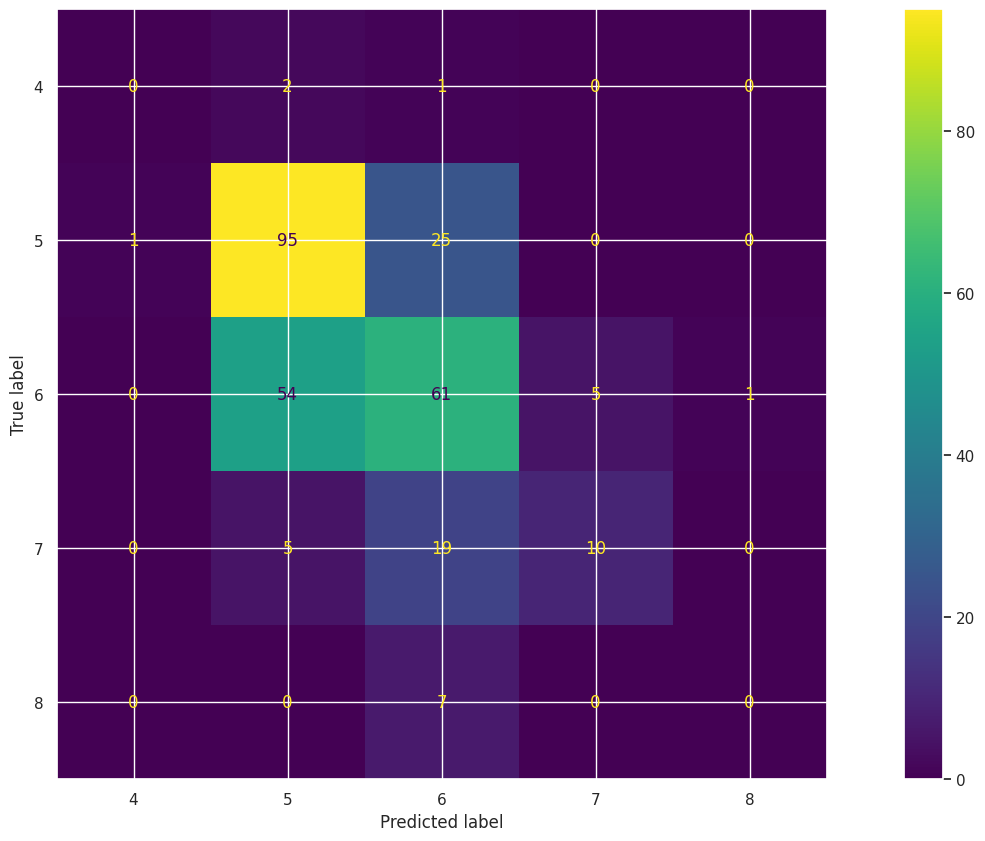

In [31]:
ConfusionMatrixDisplay.from_predictions(y_test, y_prediccionCatNB)

**_Optimización (probar el acceso con distintos clasificadores)_**

*Finalmente prueba los distintos clasificadores y realiza una pequeña comparativa indicando cuál obtiene mejores resultados*

El modelo de Naive Bayes que mejor resultado me ha dado ha sido el de GuassianNB con un total de 0.597902. En un principio el atributo "total sulfur dioxide" me estaba dando problemas con el modelo CategoricalNB. Para solucionar ese problema decidí eliminar el atributo pero resultó que algunos de los modelos como GuassianNB bajaron, otros se quedaron iguales como BernoulliNB y otros subieron MultinomialNB. La subida o la bajada es infima pero si observamos el mapa de calor tiene sentido que ocurra porque la puntuación de este atributo es de -0.18, es baja, lo normal sería eliminarla ya que, se acerca demasiado a 0. Aunque si nos fijamos en los demás atributos, los que más se acercan a 1 o -1 con los que tienen una nota de -0.41 o 0.48. Entonces no hay mucho donde elegir y de ahí la decisión de dejarlo en los demás modelos excepto en el CategoricalNB.

In [ ]:
print("La probabilidad de acertar con GaussianNB es:", accuracy_score(y_test, y_prediccionGNB))
print("La probabilidad de acertar con MultinomialNB es:", accuracy_score(y_test, y_prediccionMNB))
print("La probabilidad de acertar con ComplementNB es:", accuracy_score(y_test, y_prediccionCNB))
print("La probabilidad de acertar con BernoulliNB es:", accuracy_score(y_test, y_prediccionBNB))
print("La probabilidad de acertar con CategoricalNB es:", accuracy_score(y_test, y_prediccionCatNB))

La probabilidad de acertar con GaussianNB es: 0.5979020979020979
La probabilidad de acertar con MultinomialNB es: 0.458041958041958
La probabilidad de acertar con ComplementNB es: 0.5174825174825175
La probabilidad de acertar con BernoulliNB es: 0.40559440559440557
La probabilidad de acertar con CategoricalNB es: 0.5804195804195804
